# **Logistic Regression – Enhanced Jupyter Notebook (2025 Edition)**

This notebook gives you a **complete, step-by-step, exam + interview + implementation ready** guide to **Logistic Regression**.

---

## ✅ What you will learn

- Why Logistic Regression is used for **classification**, not regression  
- The **sigmoid (logistic)** function in depth  
- Hypothesis function \( h_\theta(x) = \sigma(w^T x + b) \)  
- **Log loss / cross-entropy** cost function  
- **Gradient descent** derivation & implementation from scratch  
- Training Logistic Regression on synthetic data (binary classification)  
- Plotting **decision boundary**  
- Comparing with **`sklearn.linear_model.LogisticRegression`**  
- Extending to **multi-class (one-vs-rest idea)**  


## 1. Intuition: Why Logistic Regression?

Consider a **binary classification** problem:

- Output \( y \in \{0, 1\} \)
- Input/features \( x \in \mathbb{R}^n \)

Examples:
- Spam (1) vs Not Spam (0)  
- Has disease (1) vs Healthy (0)  
- Clicked Ad (1) vs Not Clicked (0)  

### ❌ Why not Linear Regression for classification?

If we use linear regression for classification:

\[
\hat{y} = w^T x + b
\]

- Output can be **less than 0** or **greater than 1**  
- It doesn't represent a **probability**  
- Decision boundary is not calibrated to probabilities

### ✅ Logistic Regression Fixes This

We pass the linear combination into a **sigmoid function** to squash it into **[0, 1]**:

\[
\hat{y} = h_\theta(x) = \sigma(z) = \sigma(w^T x + b)
\]

where:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Now:
- \(\hat{y}\) can be interpreted as **P(y = 1 \mid x)**  
- We can define a **threshold**, typically 0.5:  
  - If \(\hat{y} \ge 0.5 \Rightarrow \text{class } 1\)  
  - Else \(\Rightarrow \text{class } 0\)


## 2. Sigmoid (Logistic) Function

The **sigmoid function**:

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

### Properties

- Output range: **(0, 1)**  
- As \( z \to +\infty \Rightarrow \sigma(z) \to 1 \)  
- As \( z \to -\infty \Rightarrow \sigma(z) \to 0 \)  
- Symmetric around 0.5 at \( z = 0 \)  
- Derivative is very elegant:

\[
\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))
\]


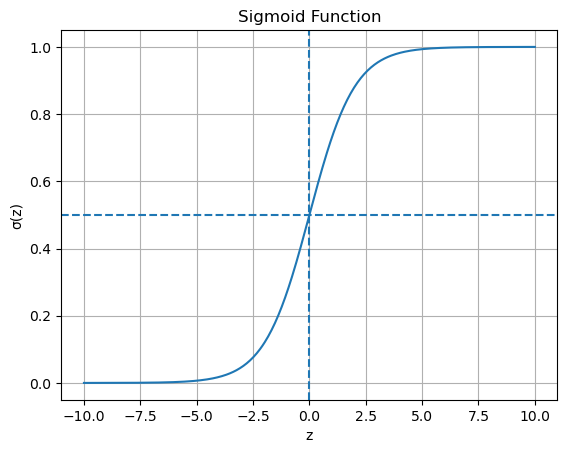

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 400)
s = sigmoid(z)

plt.figure()
plt.plot(z, s)
plt.axvline(0, linestyle='--')
plt.axhline(0.5, linestyle='--')
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True)
plt.show()

## 3. Logistic Regression Hypothesis

For input vector \( x \in \mathbb{R}^n \):

- Let parameters be \( w \in \mathbb{R}^n \) and bias \( b \in \mathbb{R} \)
- Compute linear score: \( z = w^T x + b \)
- Apply sigmoid: 

\[
h_\theta(x) = \hat{y} = \sigma(z) = \sigma(w^T x + b)
\]

Interpretation:

\[
h_\theta(x) = P(y=1 \mid x; w, b)
\]

Decision rule (binary):
- If \( h_\theta(x) \ge 0.5 \Rightarrow \hat{y} = 1\)
- Else \( \hat{y} = 0 \)


## 4. Loss Function: Log Loss / Cross-Entropy

For a single training example \((x^{(i)}, y^{(i)})\) with prediction \(\hat{y}^{(i)} = h_\theta(x^{(i)})\):

We use **logistic loss** (a.k.a. cross-entropy for binary):

\[
L(\hat{y}^{(i)}, y^{(i)}) = - \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
\]

- If \(y=1\): loss = \(-\log(\hat{y})\) → small if \(\hat{y}\) is close to 1  
- If \(y=0\): loss = \(-\log(1 - \hat{y})\) → small if \(\hat{y}\) is close to 0  

For **m training examples**, cost function (to minimize):

\[
J(w, b) = \frac{1}{m} \sum_{i=1}^{m} L(\hat{y}^{(i)}, y^{(i)})
\]

Our goal:

\[
\min_{w, b} J(w, b)
\]

We use **gradient descent** to optimize.


## 5. Gradient Descent for Logistic Regression (Derivation Sketch)

We compute partial derivatives of cost w.r.t parameters.

Let:
- \( \hat{y}^{(i)} = \sigma(w^T x^{(i)} + b) \)
- \( m \) = number of samples

It turns out:

\[
\frac{\partial J}{\partial w} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)}) x^{(i)}
\]

\[
\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}^{(i)} - y^{(i)})
\]

**Gradient Descent Update Rules:**

For learning rate \( \alpha \):

\[
w := w - \alpha \frac{\partial J}{\partial w}
\]

\[
b := b - \alpha \frac{\partial J}{\partial b}
\]

We implement this now from scratch.


## 6. Create a Synthetic Binary Classification Dataset

We will create a simple 2D dataset using NumPy:
- Class 0 and Class 1 points sampled from two different Gaussian clusters  
- This will allow us to visualize the **decision boundary** in 2D easily.


X shape: (200, 2)
y shape: (200, 1)


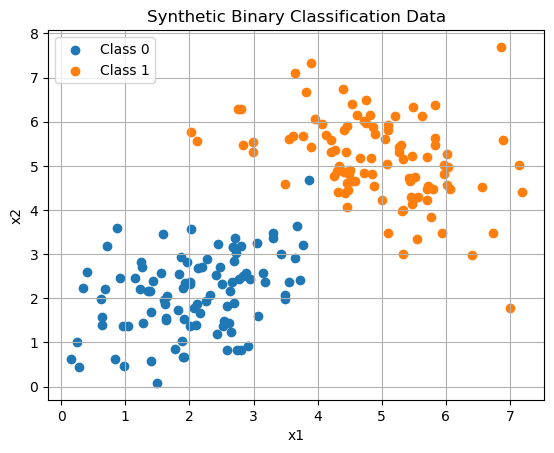

In [2]:
np.random.seed(42)

# Generate class 0
mean0 = [2, 2]
cov0 = [[1.0, 0.5], [0.5, 1.0]]
n0 = 100
X0 = np.random.multivariate_normal(mean0, cov0, n0)
y0 = np.zeros((n0, 1))

# Generate class 1
mean1 = [5, 5]
cov1 = [[1.0, -0.3], [-0.3, 1.0]]
n1 = 100
X1 = np.random.multivariate_normal(mean1, cov1, n1)
y1 = np.ones((n1, 1))

# Combine
X = np.vstack((X0, X1))
y = np.vstack((y0, y1))

print("X shape:", X.shape)
print("y shape:", y.shape)

# Scatter plot of data
plt.figure()
plt.scatter(X0[:,0], X0[:,1], label='Class 0')
plt.scatter(X1[:,0], X1[:,1], label='Class 1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Synthetic Binary Classification Data')
plt.legend()
plt.grid(True)
plt.show()

## 7. Logistic Regression From Scratch (Vectorized)

We will implement:

- `sigmoid(z)`  
- `predict_proba(X, w, b)`  
- `compute_cost(X, y, w, b)`  
- `compute_gradients(X, y, w, b)`  
- `gradient_descent(X, y, w, b, alpha, num_iters)`  


In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict_proba(X, w, b):
    # X: (m, n), w: (n, 1), b: scalar
    z = X @ w + b  # (m,1)
    return sigmoid(z)

def compute_cost(X, y, w, b):
    m = X.shape[0]
    y_hat = predict_proba(X, w, b)
    # Add small epsilon to avoid log(0)
    eps = 1e-15
    cost = - (1/m) * np.sum(y * np.log(y_hat + eps) + (1 - y) * np.log(1 - y_hat + eps))
    return cost

def compute_gradients(X, y, w, b):
    m = X.shape[0]
    y_hat = predict_proba(X, w, b)
    dw = (1/m) * (X.T @ (y_hat - y))  # (n,1)
    db = (1/m) * np.sum(y_hat - y)
    return dw, db

def gradient_descent(X, y, alpha=0.1, num_iters=1000):
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0.0
    costs = []

    for i in range(num_iters):
        dw, db = compute_gradients(X, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db

        if i % 50 == 0 or i == num_iters - 1:
            cost = compute_cost(X, y, w, b)
            costs.append(cost)
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return w, b, costs

# Train model
w, b, costs = gradient_descent(X, y, alpha=0.1, num_iters=1000)
print("Learned w:\n", w)
print("Learned b:", b)

Iteration 0: Cost = 0.6261
Iteration 50: Cost = 0.4999
Iteration 100: Cost = 0.4165
Iteration 150: Cost = 0.3574
Iteration 200: Cost = 0.3140
Iteration 250: Cost = 0.2811
Iteration 300: Cost = 0.2553
Iteration 350: Cost = 0.2346
Iteration 400: Cost = 0.2176
Iteration 450: Cost = 0.2034
Iteration 500: Cost = 0.1914
Iteration 550: Cost = 0.1811
Iteration 600: Cost = 0.1721
Iteration 650: Cost = 0.1642
Iteration 700: Cost = 0.1572
Iteration 750: Cost = 0.1510
Iteration 800: Cost = 0.1454
Iteration 850: Cost = 0.1404
Iteration 900: Cost = 0.1358
Iteration 950: Cost = 0.1316
Iteration 999: Cost = 0.1278
Learned w:
 [[0.76726176]
 [0.95977591]]
Learned b: -5.97707747140902


## 8. Plot Cost vs Iterations

This helps you see whether gradient descent is **converging**.


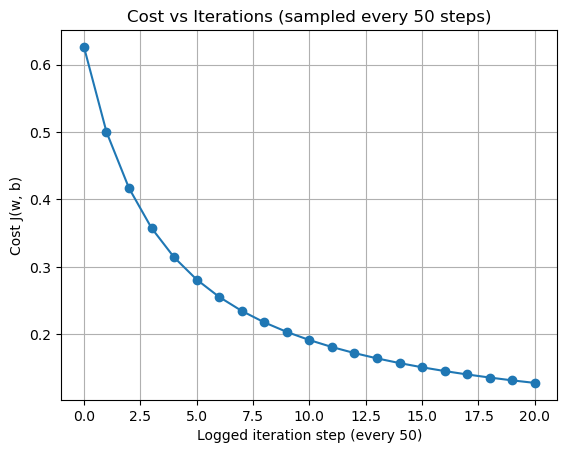

In [4]:
plt.figure()
plt.plot(costs, marker='o')
plt.title('Cost vs Iterations (sampled every 50 steps)')
plt.xlabel('Logged iteration step (every 50)')
plt.ylabel('Cost J(w, b)')
plt.grid(True)
plt.show()

## 9. Visualize Decision Boundary

For 2D features (x1, x2), decision boundary is:

\[
w_1 x_1 + w_2 x_2 + b = 0
\]

Solve for \(x_2\):

\[
x_2 = -\\frac{b + w_1 x_1}{w_2}
\]

We will plot:
- Data points for class 0 and 1  
- The learned decision boundary line  


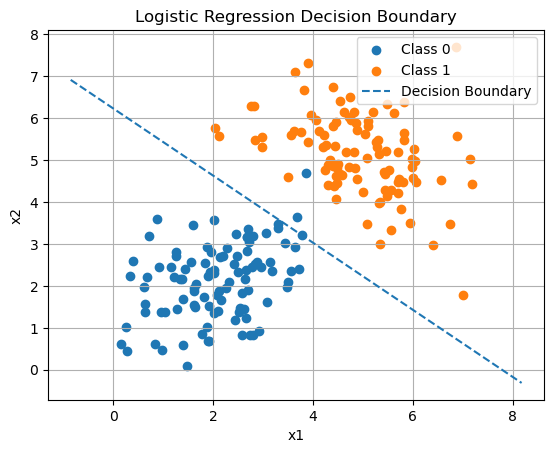

In [5]:
# Only valid if we have 2 features
w1, w2 = w[0,0], w[1,0]

x1_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
x2_vals = -(b + w1 * x1_vals) / (w2 + 1e-15)  # avoid division by zero

plt.figure()
plt.scatter(X0[:,0], X0[:,1], label='Class 0')
plt.scatter(X1[:,0], X1[:,1], label='Class 1')
plt.plot(x1_vals, x2_vals, linestyle='--', label='Decision Boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Logistic Regression Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()

## 10. Prediction & Accuracy

We now implement:

- `predict(X, w, b, threshold=0.5)` → returns 0/1  
- Compute accuracy on the training data  


In [6]:
def predict(X, w, b, threshold=0.5):
    probs = predict_proba(X, w, b)
    return (probs >= threshold).astype(int)

y_pred = predict(X, w, b)
accuracy = np.mean(y_pred == y)
print(f"Training Accuracy: {accuracy*100:.2f}%")

Training Accuracy: 98.50%


## 11. Compare With `sklearn.linear_model.LogisticRegression`

We now verify our implementation against **sklearn's LogisticRegression**.


In [7]:
from sklearn.linear_model import LogisticRegression

# Sklearn expects 1D y
y_flat = y.ravel()

clf = LogisticRegression()
clf.fit(X, y_flat)

sk_acc = clf.score(X, y_flat)
print(f"Sklearn LogisticRegression Accuracy: {sk_acc*100:.2f}%")

print("Our w:", w.ravel())
print("Sklearn w:", clf.coef_)
print("Our b:", b)
print("Sklearn b:", clf.intercept_)

Sklearn LogisticRegression Accuracy: 99.50%
Our w: [0.76726176 0.95977591]
Sklearn w: [[1.85459163 2.21252357]]
Our b: -5.97707747140902
Sklearn b: [-15.27712537]


## 12. (Optional) Simple Step-Wise Visualization of Training

We can simulate a **simple animation** by training for a few steps and plotting the decision boundary after each stage.

> Note: This is not a smooth animation, but a sequence of plots showing how the decision boundary changes.


Iteration 299


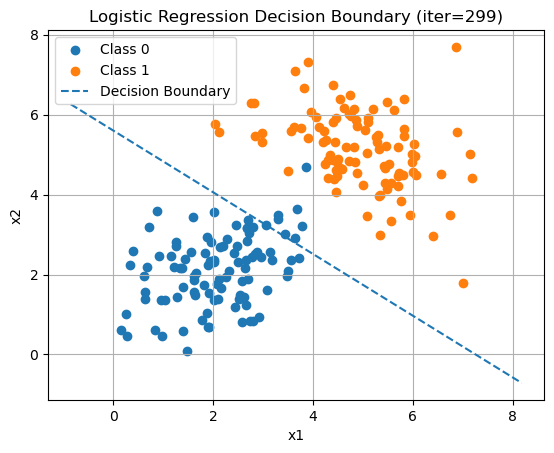

In [10]:
from IPython.display import clear_output
import time

def gradient_descent_animate(X, y, alpha=0.1, num_iters=200, display_every=50):
    m, n = X.shape
    w = np.zeros((n, 1))
    b = 0.0

    for i in range(num_iters):
        dw, db = compute_gradients(X, y, w, b)
        w = w - alpha * dw
        b = b - alpha * db

        if i % display_every == 0 or i == num_iters - 1:
            clear_output(wait=True)
            print(f"Iteration {i}")
            # Plot boundary
            w1, w2 = w[0,0], w[1,0]
            x1_vals = np.linspace(X[:,0].min()-1, X[:,0].max()+1, 100)
            x2_vals = -(b + w1 * x1_vals) / (w2 + 1e-15)

            plt.figure()
            plt.scatter(X0[:,0], X0[:,1], label='Class 0')
            plt.scatter(X1[:,0], X1[:,1], label='Class 1')
            plt.plot(x1_vals, x2_vals, linestyle='--', label='Decision Boundary')
            plt.title(f'Logistic Regression Decision Boundary (iter={i})')
            plt.xlabel('x1')
            plt.ylabel('x2')
            plt.legend()
            plt.grid(True)
            plt.show()
            time.sleep(0.7)

    return w, b

# To see this in Jupyter, uncomment and run:
w_anim, b_anim = gradient_descent_animate(X, y, alpha=0.1, num_iters=300, display_every=60)


## 13. Extension to Multi-Class Classification (One-vs-Rest Idea)

Logistic Regression is naturally a **binary classifier**.

For **multi-class (K classes)**, a common strategy (used by sklearn by default for LR) is:

### One-vs-Rest (OvR) / One-vs-All:

- Train **K separate binary classifiers**  
- Each classifier k predicts **P(y = k \| x)** vs "not k"  
- At prediction time, choose class with highest predicted probability  

Another approach is **Softmax Regression** (Multinomial Logistic Regression), where we use a **softmax function** instead of sigmoid and optimize a generalized cross-entropy.

But the **binary Logistic Regression** you've implemented here is the core building block.


## 14. Summary

In this notebook, you learned:

- The intuition behind Logistic Regression for binary classification  
- Sigmoid function and its properties  
- How to define logistic loss and cost function  
- How to derive and implement gradient descent for Logistic Regression  
- How to visualize the decision boundary in 2D  
- How to compare your implementation with `sklearn`  
- A glimpse of training visualization and multi-class extension  

You can now:
- Use this as a **template** in ML assignments  
- Revise for **theory + derivations** for exams  
- Prepare for **interviews** that ask you to implement LR from scratch  
